##### Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the configuration of the plots we will create

###### Read in the data

We will load data here from CSV file

In [2]:
df = pd.read_csv('movies.csv')
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


##### Filtering the data

In [4]:
# Checking the null values

for col in df.columns:
    n_missing = sum(df[col].isnull())
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}: {pct_missing}% ({n_missing})')

name: 0.0% (0)
rating: 0.010041731872717789% (77)
genre: 0.0% (0)
year: 0.0% (0)
released: 0.0002608242044861763% (2)
score: 0.0003912363067292645% (3)
votes: 0.0003912363067292645% (3)
director: 0.0% (0)
writer: 0.0003912363067292645% (3)
star: 0.00013041210224308815% (1)
country: 0.0003912363067292645% (3)
budget: 0.2831246739697444% (2171)
gross: 0.02464788732394366% (189)
company: 0.002217005738132499% (17)
runtime: 0.0005216484089723526% (4)


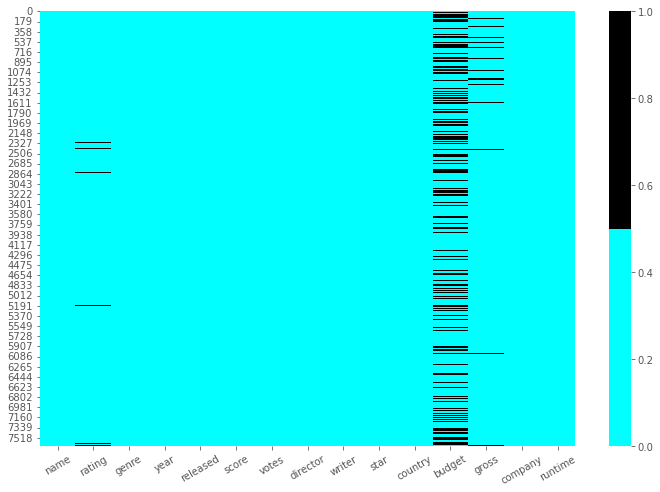

In [5]:
# Visualizing the missing data

cols = df.columns[:]
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(['cyan','black']))  # Black is missing, cyan is non-missing
plt.xticks(rotation=30)
plt.show()

In [6]:
# Checking for duplicates

sum(df.duplicated())

0

In [7]:
#df[df.duplicated('name')]      
df.loc[df.duplicated(subset = ['name'])].name.count()     # Number of movies having just the same name

156

In [8]:
# Data types for the columns

df[['budget','gross']] = df[['budget','gross']].astype('Int64')
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0


In [9]:
# Year column has some incorrect values, so adding release year column

#df['released'].str.split(' ')[0][2]

df['released year'] = df['released'].str.split(' ', n=3, expand=True)[2]
df.drop('year', axis=1, inplace=True)
df.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980


In [10]:
# Sorting movies by highest gross revenue

df.sort_values(by='gross', ascending=False, inplace=False).head(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997


In [11]:
# Sorting out genre by movie counts

genre = df.groupby(['genre']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']

genre

,genre,count
0,Comedy,2245
1,Action,1705
2,Drama,1518
3,Crime,551
4,Biography,443
5,Adventure,427
6,Animation,338
7,Horror,322
8,Fantasy,44
9,Mystery,20


In [12]:
# Accumulating the smaller genre collections in a single group 'Others'

others = genre.loc[list(range(8,19))]['count'].sum()
genre = genre.drop(list(range(8,19)))
genre.loc[8] = ['Others', others]

genre

,genre,count
0,Comedy,2245
1,Action,1705
2,Drama,1518
3,Crime,551
4,Biography,443
5,Adventure,427
6,Animation,338
7,Horror,322
8,Others,119


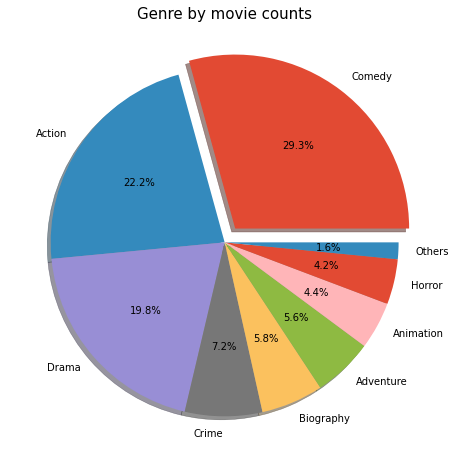

In [13]:
# Visualizing the genre counts in a pie chart

plt.pie(genre['count'], labels=genre['genre'], autopct='%1.1f%%', explode=(0.1,0,0,0,0,0,0,0,0), shadow=True) # only explode the largest slice
plt.title('Genre by movie counts', fontsize=15)
plt.show()

In [14]:
# Top 15 countries releasing the highest movies other than US

top_countries = df['country'].value_counts().reset_index().drop([0]).head(15)
top_countries = top_countries.rename(columns={'index': 'Country', 'country': 'Total movies'})
top_countries

,Country,Total movies
1,United Kingdom,816
2,France,279
3,Canada,190
4,Germany,117
5,Australia,92
6,Japan,81
7,India,62
8,Italy,61
9,Spain,47
10,Hong Kong,45


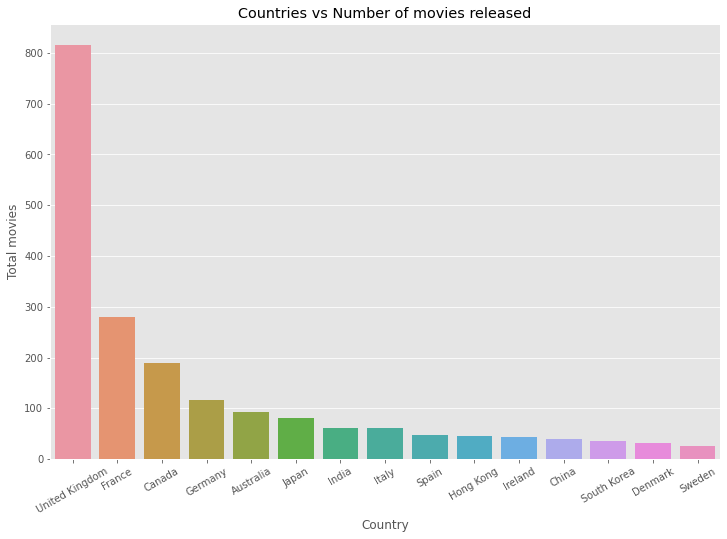

In [15]:
sns.barplot(x=top_countries['Country'], y=top_countries['Total movies']).set(title='Countries vs Number of movies released')
plt.xticks(rotation=30)
plt.show()

In [16]:
from wordcloud import WordCloud, STOPWORDS



In [17]:
df.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980


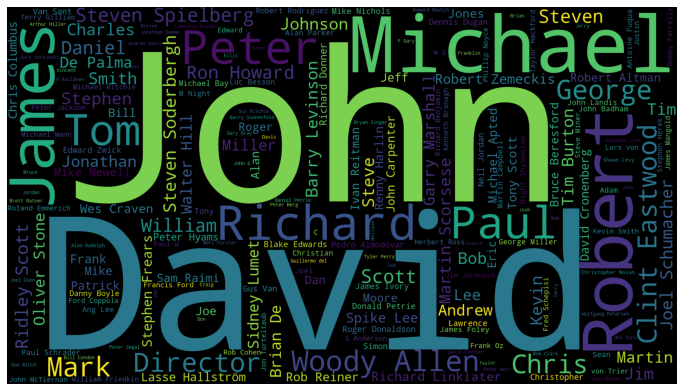

In [18]:
# View popular directors

plt.subplots()
wordcloud = WordCloud(background_color='black', width=1920, height=1080).generate(' '.join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
pd.set_option('display.max_rows', None)

##### Finding correlation in the data

Text(0, 0.5, 'Gross Revenue')

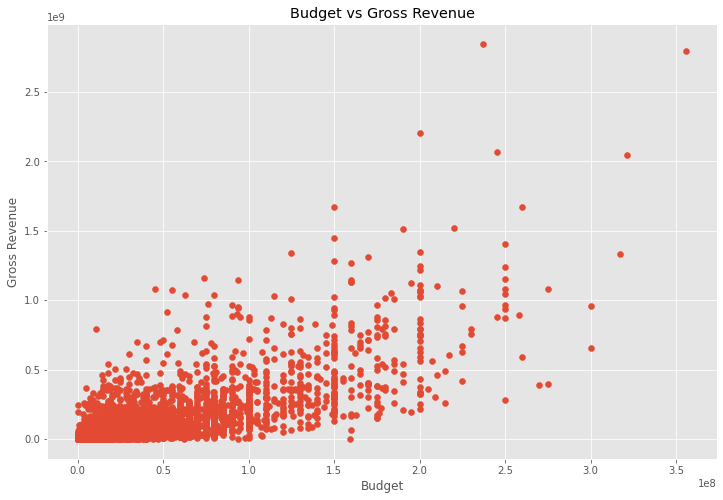

In [20]:
# Scatter plot with budget vs gross

df['budget']=df['budget'].astype('float')
df['gross']=df['gross'].astype('float')

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

<AxesSubplot:xlabel='budget', ylabel='gross'>

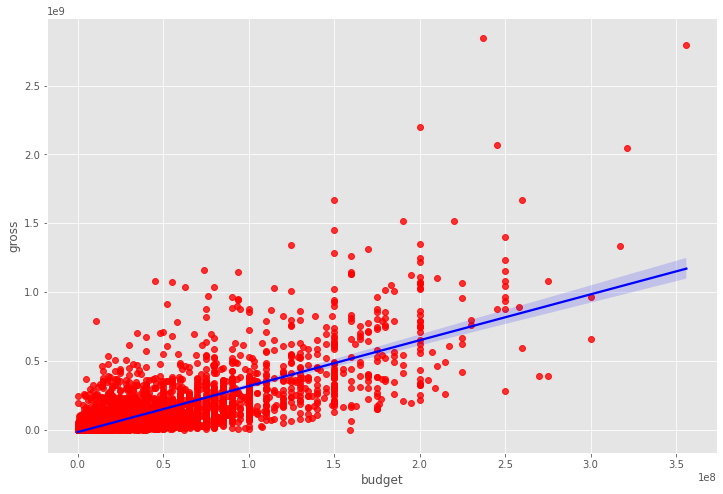

In [21]:
# Regression plot: how much budget is correlated to gross revenue

sns.regplot(x='budget', y='gross', data=df,
            scatter_kws={"color": "red"},
            line_kws={"color": "blue"})

In [22]:
df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.399451,0.309212,0.320447,0.245216,1.000000


Text(87.0, 0.5, 'Movie Features')

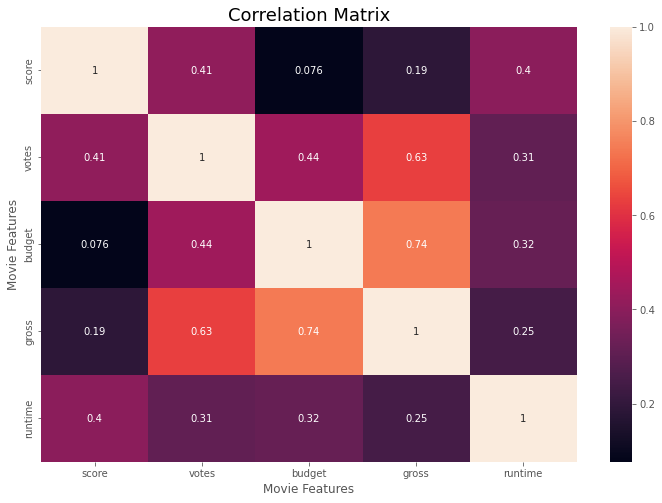

In [23]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [24]:
df.head(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980


In [25]:
# To find correlations between company and budget, revenue - we categorize companies with numeric values

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes            #cat.codes gives random numerization
        
df_numerized.head(3)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,2
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,2
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,2


Text(0.5, 1.0, 'Correlation Matrix (all features)')

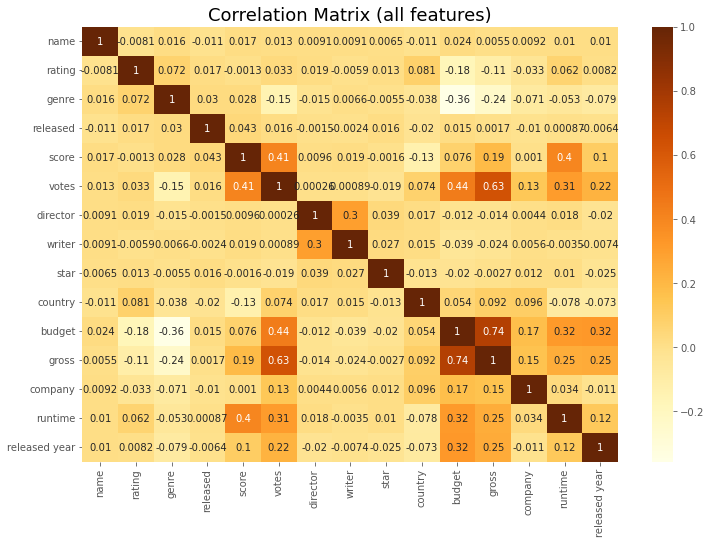

In [26]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix (all features)',fontsize=18)

In [27]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
name,1.000000,-0.008069,0.016355,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010071
rating,-0.008069,1.000000,0.072423,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.008230
genre,0.016355,0.072423,1.000000,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.078972
released,-0.011311,0.016613,0.029822,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.006411
score,0.017097,-0.001314,0.027965,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.103330
votes,0.013088,0.033225,-0.145307,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218468
director,0.009079,0.019483,-0.015258,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.019692
writer,0.009081,-0.005921,0.006567,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.007400
star,0.006472,0.013405,-0.005477,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.025231
country,-0.010737,0.081244,-0.037615,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.072682


In [28]:
# Finding high correlation

df_numerized.corr().unstack()[(df_numerized.corr().unstack() > 0.4) & (df_numerized.corr().unstack() != 1)]

score   votes     0.409182
votes   score     0.409182
        budget    0.442429
        gross     0.630757
budget  votes     0.442429
        gross     0.740395
gross   votes     0.630757
        budget    0.740395
dtype: float64

### Conclusion:

#### Budget and votes have the highest correlation to gross revenue